
# Importing libraries



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact


# Solving an ODE model



A general system of differential equations is of the form:

$$\frac{\mathrm{d}}{\mathrm{d}t}\mathbf{x}(t)
= \begin{bmatrix}\frac{\mathrm{d}}{\mathrm{d}t} x_1(t)\\ \vdots
\\ \frac{\mathrm{d}}{\mathrm{d}t} x_n(t) \end{bmatrix} = f(\mathbf{x}(t), t,
\mathbf{z}),$$

where $\mathbf{x}(t)$ and $\mathbf{z}$ are vectors and $f$ is a function that maps to
a vector. We also have to provide an initial condition:

$$\mathbf{x}(0) = \mathbf{x_0}.$$

For us, the $\mathbf{x}$ represents all the classes in our model,
$\mathbf{z}$ all the parameters in our model and $t$ represents time.

To solve an ODE in Python we have define the function $f$ and provide
the initial condition $\mathbf{x_0}$.




# Model 1: continuous-time endemic



Model 1 has the equations

$$\mathbf{x} = \begin{bmatrix} S \\ I \\ R \end{bmatrix}$$

$$\frac{\mathrm{d}}{\mathrm{d}t}\mathbf{x}(t)
= \begin{bmatrix}\frac{\mathrm{d}}{\mathrm{d}t} S(t)
\\ \frac{\mathrm{d}}{\mathrm{d}t} I(t)
\\ \frac{\mathrm{d}}{\mathrm{d}t} R(t) \end{bmatrix}
= \begin{bmatrix} \mu N(t) - \frac{\beta a S(t) I(t)}{N} + w R(t) -\mu S(t)
\\ \frac{\beta a S(t) I(t)}{N} - \gamma I(t) - \mu I(t) \\ \gamma
I(t) - \mu R(t) - w R(t)
\end{bmatrix}$$

plus and initial condition determined by how many individuals are
infected at the start of the epidemic, $I(0)$, and how many are
protected $R(0)$.




## Defining f



In [220]:
def f_model_1(x, t, beta, a, mu, w, gamma, N):
    S = x[0]
    I = x[1]
    R = x[2]

    dS_dt = mu*N - beta*a*S*I/N + w*R - mu*S
    dI_dt = beta*a*S*I/N - gamma*I - mu*I
    dR_dt = gamma*I - mu*R - w*R

    return [dS_dt, dI_dt, dR_dt]


## Solving the model



In [221]:
def model_1(beta, a, mu, w, one_over_gamma, initial_I, initial_R, N, max_time):

    ts = np.linspace(0, max_time, 1000)
    x0 = [N-initial_I-initial_R, initial_I, initial_R]
    xs = odeint(f_model_1,
                x0,
                ts,
                args=(beta, a, mu, w, 1/one_over_gamma, N))

    return xs


## Running our first model



In [222]:
model_1(0.05, 10, 0.001, 0.01, 5, 1, 0, 100, 300)

array([[  9.90000000e+01,   1.00000000e+00,   0.00000000e+00],
       [  9.88451356e+01,   1.09217778e+00,   6.26866297e-02],
       [  9.86765007e+01,   1.19256281e+00,   1.30936529e-01],
       ..., 
       [  4.00476716e+01,   2.94006101e+00,   5.70122674e+01],
       [  4.00600654e+01,   2.93941601e+00,   5.70005186e+01],
       [  4.00724028e+01,   2.93882571e+00,   5.69887715e+01]])


## Plotting the results



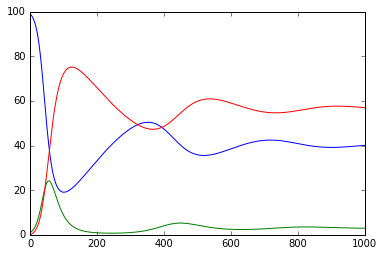

In [223]:
results_model_1 = model_1(0.05, 10, 0.001, 0.01, 5, 1, 0, 100, 300)
plt.plot(results_model_1)
plt.show()

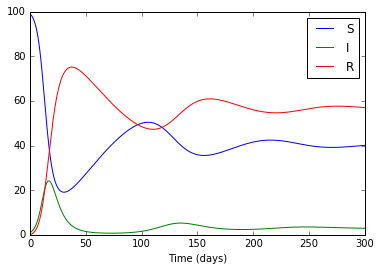

In [224]:
results_model_1 = model_1(0.05, 10, 0.001, 0.01, 5, 1, 0, 100, 300)

plt.plot(np.linspace(0, 300, 1000), results_model_1)

plt.xlabel("Time (days)")

plt.legend(["S", "I", "R"])

plt.show()


## Improve code and set default values



In [1]:
resolution = 1000
legends = ["S (susceptible)", "I (infectious)", "R (recovered)"]
xlabel = "Time (days)"


def plot_model(ts, xs):
    plt.plot(ts, xs)
    plt.legend(legends)
    plt.xlabel(xlabel)
    plt.ylim([0, np.sum(xs[0])])
    plt.show()


def model_1(beta=0.05,
            a=10.0,
            mu=0.001,
            w=0.01,
            one_over_gamma=5.0,
            initial_I=1,
            initial_R=0,
            N=100,
            max_time=300.0):

    ts = np.linspace(0, max_time, resolution)
    x0 = [N-initial_I-initial_R, initial_I, initial_R]
    xs = odeint(f_model_1,
                x0,
                ts,
    args=(beta, a, mu, w, 1/one_over_gamma, N))

    plot_model(ts, xs)

    R0 = beta*a/(1/one_over_gamma+mu)
    print("R0 = {:.2f}".format(R0))

    return xs

In [1]:
model_1()

In [1]:
model_1(mu=0.002, beta=0.06)


# Interacting with the parameters



In [1]:
interact(model_1,
         beta=(0.01, 0.1, 0.001),
         a=(5, 15, 0.1),
         mu=(0, 0.01, 0.0001),
         w=(0.001, 0.1, 0.001),
         one_over_gamma=(2, 30, 0.1),
         N=(0, 1000, 10.0),
         initial_I=(0, 50),
         initial_R=(0, 50),
         max_time=(1, 500, 10))

In [1]:
default_sliders = {'beta':(0.01, 0.1, 0.001),
                   'a':(5, 15, 0.1),
                   'mu':(0.0, 0.01, 0.0001),
                   'w':(0.001, 0.1, 0.001),
                   'one_over_gamma':(2.0, 30.0, 0.1),
                   'N':(1, 20000, 50),
                   'initial_I':(0, 50),
                   'initial_R':(0, 50),
                   'max_time':(1, 500, 10)}


interact(model_1, **default_sliders)


## Improving sliders



In [1]:
import ipywidgets as widgets


default_sliders['one_over_gamma'] = widgets.FloatSlider(
    value=5.0,
    min=2.0,
    max=10.0,
    step=0.1,
    description='1/gamma')


interact(model_1, **default_sliders)

For more on widgets check
[http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html](http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)




# Model 2: continuous-time epidemic



In Model 2 we do not account for births and deaths:

$$\frac{\mathrm{d}}{\mathrm{d}t}\mathbf{x}(t)
= \begin{bmatrix}\frac{\mathrm{d}}{\mathrm{d}t} S(t)
\\ \frac{\mathrm{d}}{\mathrm{d}t} I(t)
\\ \frac{\mathrm{d}}{\mathrm{d}t} R(t) \end{bmatrix}
= \begin{bmatrix} - \frac{\beta a S(t) I(t)}{N} + w R(t)
\\ \frac{\beta a S(t) I(t)}{N} - \gamma I(t) \\ \gamma
I(t) - w R(t)
\end{bmatrix}$$

but we assume that a certain percentage $p$ of the population is
vaccinated before the start of the epidemic, and are thus protected:

$$\mathbf{x_0}
= \begin{bmatrix} N - I_0 - p N
\\ I_0 \\ pN \end{bmatrix}$$



In [1]:
def f_model_2(x, t, beta, a, p, w, gamma, N):
    S = x[0]
    I = x[1]
    R = x[2]

    new_infections = beta*a*S*I/N
    dS_dt = - new_infections + w*R
    dI_dt = new_infections - gamma*I
    dR_dt = gamma*I - w*R

    return [dS_dt, dI_dt, dR_dt]


def model_2(beta=0.05,
            a=10,
            w=0.00,
            one_over_gamma=5.0,
            p=0.2,
            initial_I=1.0,
            N=100.0,
            max_time=100.0):

    ts = np.linspace(0, max_time, resolution)
    x0 = [N-initial_I-p*N, initial_I, p*N]
    xs = odeint(f_model_2,
                x0,
                ts,
                args=(beta, a, p, w, 1/one_over_gamma, N))

    plot_model(ts, xs)

    R0 = beta*a*one_over_gamma
    Rv = (1-p)*R0
    print("R0 = {:.2f}".format(R0))
    print("Rv = {:.2f}".format(Rv))

    return xs

In [1]:
model_2()


## Interacting with model 2



In [1]:
default_sliders['p'] = (0, 1, 0.1)

interact(model_2, **default_sliders)


## Computing the final size in Model 2



We can modify model 2 to find the final size of the epidemic, by
keeping track of the cumulative infections ($C$) using the equations:

$$\frac{\mathrm{d}}{\mathrm{d}t}\mathbf{x}(t)
= \begin{bmatrix}\frac{\mathrm{d}}{\mathrm{d}t} S(t)
\\ \frac{\mathrm{d}}{\mathrm{d}t} I(t)
\\ \frac{\mathrm{d}}{\mathrm{d}t} R(t)
\\ \frac{\mathrm{d}}{\mathrm{d}t} C(t)\end{bmatrix}
= \begin{bmatrix} - \frac{\beta a S(t) I(t)}{N} + w R(t)
\\ \frac{\beta a S(t) I(t)}{N} - \gamma I(t) \\ \gamma
I(t) - w R(t) \\
\frac{\beta a S(t) I(t)}{N}
\end{bmatrix}$$

and the initial condition:

$$\mathbf{x_0}
= \begin{bmatrix} N - I_0 - p N
\\ I_0 \\ pN \\ 0\end{bmatrix}$$



In [1]:
def f_model_2(x, t, beta, a, p, w, gamma, N):
    S = x[0]
    I = x[1]
    R = x[2]

    new_infections = beta*a*S*I/N
    dS_dt = -new_infections + w*R
    dI_dt = new_infections - gamma*I
    dR_dt = gamma*I - w*R
    dC_dt = new_infections

    return [dS_dt, dI_dt, dR_dt, dC_dt]


def model_2(beta=0.05,
            a=10,
            w=0.0,
            one_over_gamma=5.0,
            p=0.2,
            initial_I=1,
            N=100,
            max_time=100):

    ts = np.linspace(0, max_time, resolution)
    x0 = [N-initial_I-p*N, initial_I, p*N, 0]
    xs = odeint(f_model_2,
                x0,
                ts,
                args=(beta, a, p, w, 1/one_over_gamma, N))

    plot_model(ts, xs)

    R0 = beta*a*one_over_gamma
    Rv = (1-p)*R0
    print("R0 = {:.2f}".format(R0))
    print("Rv = {:.2f}".format(Rv))

    return xs

In [1]:
model_2()


## Fixing the labels



In [1]:
legends = ['S (susceptible)',
           'I (infectious)',
           'R (recovered)',
           'C (cumulative)']
model_2()


## Interacting with model 2 (again)



In [1]:
interact(model_2, **default_sliders)


# Model 4: Impact of vaccination delay and capacity during an epidemic



In [1]:
def f_model_4(x, t, beta, a, efficacy, gamma, N, vacc_per_day, start_vacc, end_vacc):
    S = x[0]
    I = x[1]
    R = x[2]
    Sv = x[3]
    Iv = x[4]
    Rv = x[5]

    if t < start_vacc or t > end_vacc:
        vacc = 0
    else:
        vacc = vacc_per_day

    new_infections_S = beta*a*S*(I+Iv)/N
    new_infections_Sv = beta*a*Sv*(I+Iv)/N
    non_vacc = S + I + R
    dS_dt = - new_infections_S - vacc*S/non_vacc
    dI_dt = new_infections_S - gamma*I - vacc*I/non_vacc
    dR_dt = gamma*I - vacc*R/non_vacc
    dSv_dt = - new_infections_Sv + (1-efficacy)*vacc*S/non_vacc
    dIv_dt = new_infections_Sv - gamma*Iv + vacc*I/non_vacc
    dRv_dt = gamma*Iv + vacc*R/non_vacc + efficacy*vacc*S/non_vacc
    dC_dt = new_infections_S + new_infections_Sv

    return [dS_dt, dI_dt, dR_dt, dSv_dt, dIv_dt, dRv_dt, dC_dt]


def model_4(beta=0.02,
            a=10,
            efficacy=0.85,
            one_over_gamma=20.0,
            start_vacc=30,
            vacc_per_day=200,
            duration_vacc=30,
            initial_I=1.0,
            N=10000.0,
            max_time=365.0):

    end_vacc = start_vacc + duration_vacc

    ts = np.linspace(0, max_time, resolution)
    x0 = [N-initial_I, initial_I, 0, 0, 0, 0, 0]
    xs = odeint(f_model_4, x0, ts, args=(beta, a, efficacy, 1/one_over_gamma, N, vacc_per_day, start_vacc, end_vacc))

    legends = ['Total susceptible',
               'Total infectious',
               'Cumulative infected',
               'Vaccinated']

    total_S = xs[:, 0] + xs[:, 3]
    total_I = xs[:, 1] + xs[:, 4]
    cum_infected = xs[:, 6]
    vaccinated = xs[:, 3] + xs[:, 4] + xs[:, 5]

    ys = np.vstack([total_S, total_I, cum_infected, vaccinated]).T

    plt.plot(ts, ys)
    plt.legend(legends)
    plt.xlabel(xlabel)
    plt.ylim([0, np.sum(xs[0])])
    plt.show()

    return xs

In [1]:
model_4()


## Interacting with model 4



In [1]:
default_sliders['efficacy'] = (0, 1, 0.01)
default_sliders['start_vacc'] = (0, 30*11, 1)
default_sliders['vacc_per_day'] = (0, 800, 1)
default_sliders['duration_vacc'] = (1, 30*6, 1)

In [1]:
interact(model_4, **default_sliders)